# Starter code

Code provided by dataquest team

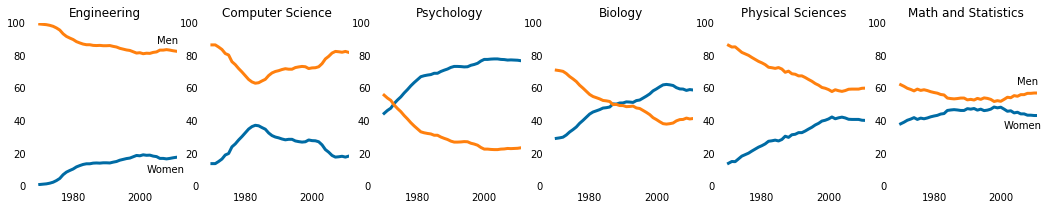

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

# My code

In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
all_cats = [stem_cats, lib_arts_cats, other_cats]

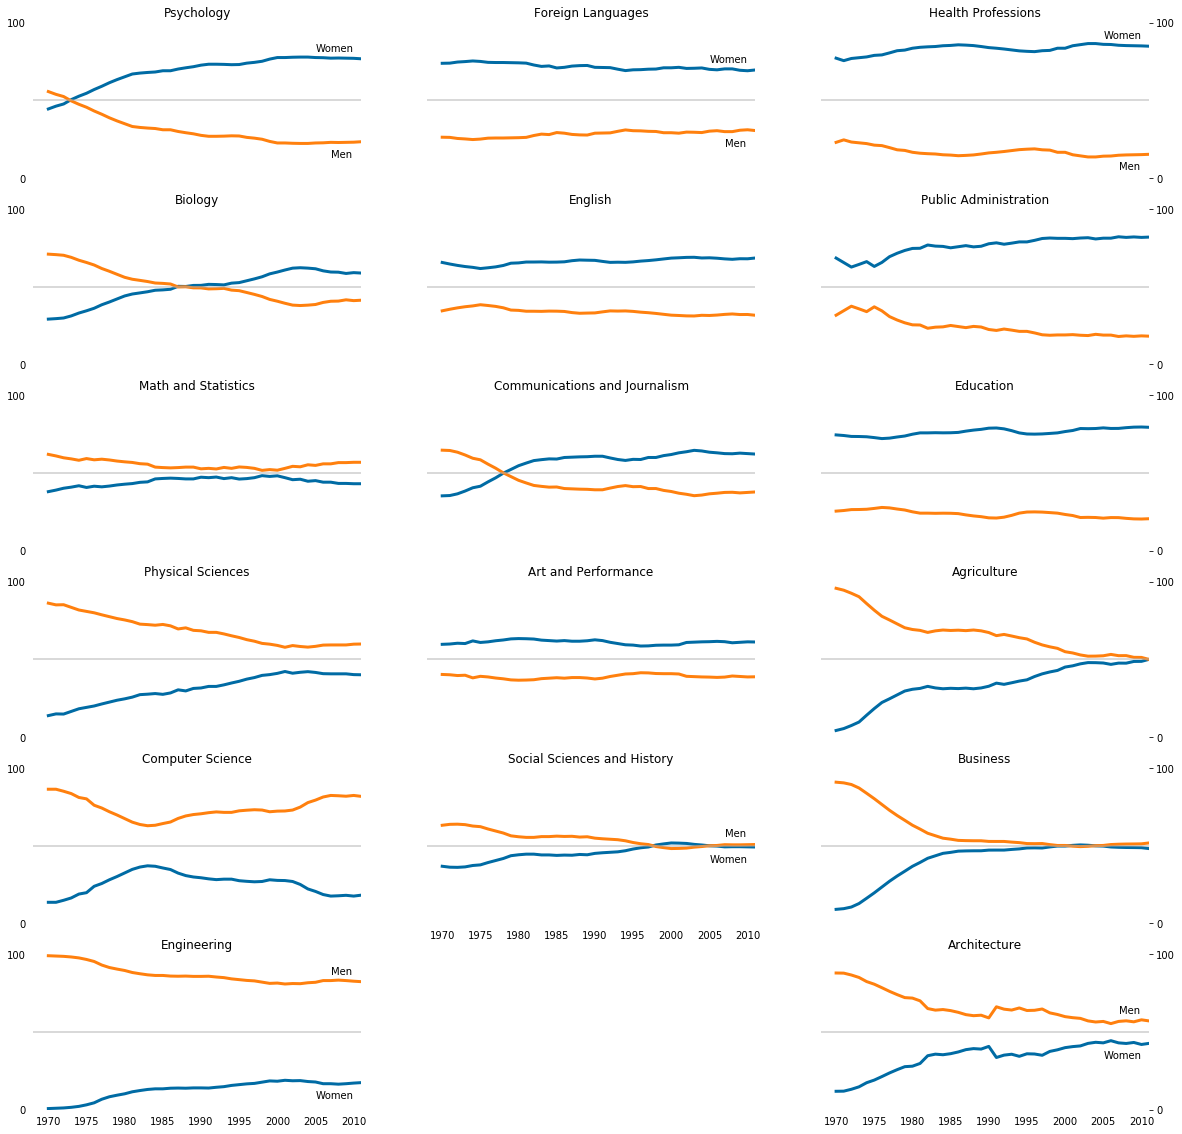

In [3]:
fig = plt.figure(figsize=(20,20))

cb_grey = (171/255, 171/255, 171/255)

rows = max([len(cats) for cats in all_cats])
columns = len(all_cats)
index = 1

for column_index, cats in enumerate(all_cats):
    for row_index, cat in enumerate(cats):
        ax = fig.add_subplot(rows, columns, columns * row_index + (column_index + 1))
        
        ax.plot(women_degrees['Year'], women_degrees[cat], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cat], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(cat)
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        if column_index == 0:
            ax.set_yticks([0,100])
        elif column_index == columns - 1:
            ax.set_yticks([0,100])
            ax.yaxis.tick_right()
        else:
            ax.set_yticks([])
        ax.axhline(50, c=cb_grey, alpha=0.6)
        
all_axes = fig.get_axes()
last_index = -1
indexes_to_anotate = []
for cats in all_cats:
    indexes_to_anotate += [last_index + 1, last_index + len(cats)]
    last_index = indexes_to_anotate[-1]
    
all_cats_flatten = [val for cats in all_cats for val in cats]
shift_up = 5
shift_down = -10
for cat_index in indexes_to_anotate:
    women_value = women_degrees[all_cats_flatten[cat_index]].iloc[-1]
    men_value = 100-women_value
    
    ax = all_axes[cat_index]
    if women_value < men_value:
        ax.text(2007, men_value + shift_up, 'Men')
        ax.text(2005, women_value + shift_down, 'Women')
    else:
        ax.text(2007, men_value + shift_down, 'Men')
        ax.text(2005, women_value + shift_up, 'Women')
        
last_index = -1
bottom_indexes = []
for cats in all_cats:
    bottom_indexes += [last_index + len(cats)]
    last_index = bottom_indexes[-1]
    
for index in bottom_indexes:
    all_axes[index].tick_params(labelbottom='on')
    
plt.savefig("gender_degrees.png")